In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dezero import Model
from dezero import optimizers  # 옵티마이저들이 들어 있는 패키지 임포트
import dezero.layers as L
import dezero.functions as F

In [2]:
# 데이터셋 생성
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

In [3]:
lr = 0.2
iters = 10000

In [4]:
class TwoLayerNet(Model):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        self.l1 = L.Linear(hidden_size)
        self.l2 = L.Linear(out_size)

    def forward(self, x):
        y = F.sigmoid(self.l1(x))
        y = self.l2(y)
        return y

In [5]:
model = TwoLayerNet(10, 1)
optimizer = optimizers.SGD(lr)  # 옵티마이저 생성
optimizer.setup(model)          # 최적화할 모델을 옵티마이저에 등록

In [6]:
for i in range(iters):
    y_pred = model(x)
    loss = F.mean_squared_error(y, y_pred)

    model.cleargrads()
    loss.backward()

    optimizer.update()  # 옵티마이저로 매개변수 갱신
    if i % 1000 == 0:
        print(loss.data)

0.8165178492839196
0.24990280802148895
0.24609876581126014
0.2372159081431807
0.20793216413350174
0.12311905720649356
0.0788816650635515
0.07655073683421637
0.07637803086238226
0.07618764131185567


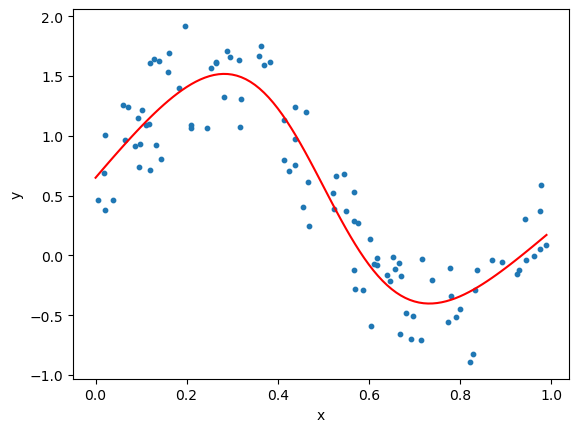

In [7]:
# 그래프로 시각화([그림 7-12]와 같음)
plt.scatter(x, y, s=10)
plt.xlabel('x')
plt.ylabel('y')
t = np.arange(0, 1, .01)[:, np.newaxis]
y_pred = model(t)
plt.plot(t, y_pred.data, color='r')
plt.show()